<a href="https://colab.research.google.com/github/shaghxyegh/Data-mining/blob/main/DataMiningPh2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

In [ ]:
csv_file_path = "/content/Cleaning (1).csv"
df = pd.read_csv(csv_file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Category_PS

In [ ]:

# Split the 'category_PS' field into a list of categories
df['categories'] = df['Category_PS'].apply(lambda x: x.split(' & '))

# Convert the DataFrame into a list of transactions
transactions = df['categories'].tolist()

# Create a DataFrame of the transactions with one-hot encoding
te = pd.get_dummies(df['categories'].apply(pd.Series).stack()).groupby(level=0).sum()





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(te)

      Action  Adventure  Arcade  Art  Audio  Auto  Beauty  Board  Books  \
0          0          0       0    0      0     0       0      0      0   
1          0          0       0    0      0     0       0      0      0   
2          0          0       0    0      0     0       0      0      0   
3          0          0       0    0      0     0       0      0      0   
4          0          0       0    0      0     0       0      0      0   
...      ...        ...     ...  ...    ...   ...     ...    ...    ...   
6245       0          0       0    1      0     0       0      0      0   
6246       0          0       0    0      0     0       0      0      0   
6247       0          0       0    0      0     0       0      0      0   
6248       0          0       0    0      0     0       0      0      0   
6249       0          0       0    0      0     0       0      0      0   

      Business  ...  Social  Sports  Strategy  Tools  Travel  Trivia  \
0            0  ...       0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
unique_categories = set(cat for sublist in df['categories'] for cat in sublist)

# Print the unique category names
print(unique_categories)

{'Photography', 'Arcade', 'Business', 'Events', 'Libraries', 'Design', 'Racing', 'Food', 'Auto', 'Music', 'Demo', 'Board', 'Card', 'Video Players', 'Social', 'Strategy', 'Productivity', 'Tools', 'Travel', 'Role Playing', 'Communication', 'Beauty', 'Education', 'Casino', 'Medical', 'Reference', 'Weather', 'Simulation', 'Word', 'Books', 'Home', 'Adventure', 'Local', 'Lifestyle', 'Educational', 'Magazines', 'Health', 'Finance', 'Editors', 'Drink', 'Audio', 'Casual', 'Shopping', 'Art', 'Vehicles', 'Navigation', 'Puzzle', 'Action', 'Personalization', 'News', 'Entertainment', 'Dating', 'Fitness', 'Comics', 'Parenting', 'Trivia', 'Maps', 'Sports', 'House'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(te.columns)

Index(['Action', 'Adventure', 'Arcade', 'Art', 'Audio', 'Auto', 'Beauty',
       'Board', 'Books', 'Business', 'Card', 'Casino', 'Casual', 'Comics',
       'Communication', 'Dating', 'Demo', 'Design', 'Drink', 'Editors',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Fitness', 'Food', 'Health', 'Home', 'House', 'Libraries', 'Lifestyle',
       'Local', 'Magazines', 'Maps', 'Medical', 'Music', 'Navigation', 'News',
       'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle',
       'Racing', 'Reference', 'Role Playing', 'Shopping', 'Simulation',
       'Social', 'Sports', 'Strategy', 'Tools', 'Travel', 'Trivia', 'Vehicles',
       'Video Players', 'Weather', 'Word'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
print(rules)


Association Rules:
        antecedents      consequents  antecedent support  consequent support  \
0       (Reference)          (Books)             0.02944             0.02944   
1           (Books)      (Reference)             0.02944             0.02944   
2            (Card)    (Brain Games)             0.03936             0.03216   
3     (Brain Games)           (Card)             0.03216             0.03936   
4         (Editors)  (Video Players)             0.02032             0.02032   
5   (Video Players)        (Editors)             0.02032             0.02032   
6         (Fitness)         (Health)             0.02864             0.02864   
7          (Health)        (Fitness)             0.02864             0.02864   
8          (Travel)          (Local)             0.01152             0.01152   
9           (Local)         (Travel)             0.01152             0.01152   
10      (Magazines)           (News)             0.01296             0.01296   
11           (News) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Genres

In [ ]:
import pandas as pd



# Split the 'Genres' field into a list of categories
df['Genre'] = df['Genres'].apply(lambda x: [genre.strip() for item in x.split(';') for genre in item.split(' & ')])

# Convert the DataFrame into a list of transactions
transactions = df['Genre'].tolist()

# Print the transactions to verify
print("Transactions:", transactions)

# Explode the list of genres into separate rows
exploded_genres = df.explode('Genre')

# One-hot encode the genres
one_hot_encoded = pd.get_dummies(exploded_genres['Genre']).groupby(exploded_genres.index).sum()

# Print the one-hot encoded DataFrame to verify
print("One-hot encoded DataFrame:")
print(one_hot_encoded)

Transactions: [['Education', 'Education'], ['Educational', 'Education'], ['Educational', 'Brain Games'], ['Educational', 'Education'], ['Educational', 'Education'], ['Role Playing', 'Action', 'Adventure'], ['Role Playing', 'Action', 'Adventure'], ['Educational', 'Education'], ['Puzzle', 'Brain Games'], ['Education'], ['Education', 'Education'], ['Education'], ['Education'], ['Education'], ['Education'], ['Education'], ['Education'], ['Education'], ['Educational', 'Brain Games'], ['Puzzle', 'Brain Games'], ['Educational', 'Education'], ['Education', 'Creativity'], ['Education', 'Education'], ['Puzzle', 'Brain Games'], ['Education', 'Education'], ['Education', 'Education'], ['Educational', 'Education'], ['Educational', 'Education'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'], ['Word'],

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(genre.columns)


Index(['Action', 'Adventure', 'Arcade', 'Art', 'Auto', 'Beauty', 'Board',
       'Books', 'Brain Games', 'Business', 'Card', 'Casino', 'Casual',
       'Comics', 'Communication', 'Creativity', 'Dating', 'Demo', 'Design',
       'Drink', 'Editors', 'Education', 'Educational', 'Entertainment',
       'Events', 'Finance', 'Fitness', 'Food', 'Health', 'Home', 'House',
       'Libraries', 'Lifestyle', 'Local', 'Magazines', 'Maps', 'Medical',
       'Music', 'Navigation', 'News', 'Parenting', 'Personalization',
       'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing',
       'Reference', 'Role Playing', 'Shopping', 'Simulation', 'Social',
       'Sports', 'Strategy', 'Tools', 'Travel', 'Trivia', 'Vehicles', 'Video',
       'Video Players', 'Weather', 'Word'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Size_PS


In [ ]:


# create boolean attributes for each category
df['Size_big'] = df['Size_PS'].apply(lambda x: x == 'big')
df['Size_medium'] = df['Size_PS'].apply(lambda x: x == 'medium')
df['Size_small'] = df['Size_PS'].apply(lambda x: x == 'small')
df['Varies_with_device'] = df['Size_PS'].apply(lambda x: x == 'Varies with device')


print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Content Rating_PS

In [ ]:


# create boolean attributes for each category
df['Teen'] = df['Content Rating_PS'].apply(lambda x: x == 'Teen')
df['Everyone'] = df['Content Rating_PS'].apply(lambda x: x == 'Everyone')
df['Everyone 10+'] = df['Content Rating_PS'].apply(lambda x: x == 'Everyone 10+')
df['Mature 17+'] = df['Content Rating_PS'].apply(lambda x: x == 'Mature 17+')


print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rating

In [ ]:
def calculate_boundaries(numbers):
    # Calculate the mean of the list
    nums  = np.array(numbers)
    total =  np.sum(nums)
    mean = total / len(numbers)
    print(f"mean is {mean}")
    std_dev = np.std(numbers)
    print(f"std_dev is {std_dev}")
    # Calculate the lower boundary (small values)
    lower_boundary = mean - 0.5 *std_dev

    # Calculate the upper boundary (big values)
    upper_boundary = mean + 0.5* std_dev

    return lower_boundary, upper_boundary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
values = []
for index, row in df.iterrows():
      values.append(float(df.loc[index,'Rating_PS']))

lower_boundary, upper_boundary = calculate_boundaries(values)
print(lower_boundary)
print(upper_boundary)
for index, row in df.iterrows():
      if df.loc[index,'Rating_PS'] < lower_boundary:
        df.loc[index,'Rating_small'] = True
        df.loc[index,'Rating_medium'] = False
        df.loc[index,'Rating_big'] = False
      elif df.loc[index,'Rating_PS'] >= lower_boundary and df.loc[index,'Rating_PS']< upper_boundary:
        df.loc[index,'Rating_medium'] = True
        df.loc[index,'Rating_small'] = False
        df.loc[index,'Rating_big'] = False
      else :
        df.loc[index,'Rating_big'] = True
        df.loc[index,'Rating_small'] = False
        df.loc[index,'Rating_medium'] = False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean is 4.033002866416
std_dev is 0.7425772809908884
3.661714225920556
4.404291506911444


In [ ]:
print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Installs_PS

In [ ]:
values = []
for index, row in df.iterrows():
      values.append(int(df.loc[index,'Installs_PS']))

lower_boundary, upper_boundary = calculate_boundaries(values)
print(lower_boundary)
print(upper_boundary)
for index, row in df.iterrows():
      if df.loc[index,'Installs_PS'] < lower_boundary:
        df.loc[index,'Installs_small'] = True
        df.loc[index,'Installs_medium'] = False
        df.loc[index,'Installs_big'] = False
      elif df.loc[index,'Installs_PS'] >= lower_boundary and df.loc[index,'Installs_PS']< upper_boundary:
        df.loc[index,'Installs_medium'] = True
        df.loc[index,'Installs_small'] = False
        df.loc[index,'Installs_big'] = False
      else :
        df.loc[index,'Installs_big'] = True
        df.loc[index,'Installs_small'] = False
        df.loc[index,'Installs_medium'] = False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean is 9100764.78064
std_dev is 14062189.18039164
2069670.1904441807
16131859.37083582


In [ ]:
print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Minimum Installs

In [ ]:
values = []
for index, row in df.iterrows():
      values.append(int(df.loc[index,'Minimum Installs']))

lower_boundary, upper_boundary = calculate_boundaries(values)
print(lower_boundary)
print(upper_boundary)
for index, row in df.iterrows():
      if df.loc[index,'Minimum Installs'] < lower_boundary:
        df.loc[index,'Minimum_small'] = True
        df.loc[index,'Minimum_medium'] = False
        df.loc[index,'Minimum_big'] = False
      elif df.loc[index,'Minimum Installs'] >= lower_boundary and df.loc[index,'Minimum Installs']< upper_boundary:
        df.loc[index,'Minimum_medium'] = True
        df.loc[index,'Minimum_small'] = False
        df.loc[index,'Minimum_big'] = False
      else :
        df.loc[index,'Minimum_big'] = True
        df.loc[index,'Minimum_small'] = False
        df.loc[index,'Minimum_medium'] = False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean is 8819765.69584
std_dev is 17901509.579778567
-130989.09404928423
17770520.485729285


In [ ]:
print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rating **Count**

In [ ]:
values = []
for index, row in df.iterrows():
      values.append(int(df.loc[index,'Rating Count']))

lower_boundary, upper_boundary = calculate_boundaries(values)
print(lower_boundary)
print(upper_boundary)
for index, row in df.iterrows():
      if df.loc[index,'Rating Count'] < lower_boundary:
        df.loc[index,'RatingCount_small'] = True
        df.loc[index,'RatingCount_medium'] = False
        df.loc[index,'RatingCount_big'] = False
      elif df.loc[index,'Rating Count'] >= lower_boundary and df.loc[index,'Rating Count']< upper_boundary:
        df.loc[index,'RatingCount_medium'] = True
        df.loc[index,'RatingCount_small'] = False
        df.loc[index,'RatingCount_big'] = False
      else :
        df.loc[index,'RatingCount_big'] = True
        df.loc[index,'RatingCount_small'] = False
        df.loc[index,'RatingCount_medium'] = False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean is 209179.86752
std_dev is 404374.26657797786
6992.734231011069
411367.00080898893


In [ ]:
print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reviews_PS

In [ ]:
values = []
for index, row in df.iterrows():
      values.append(float(df.loc[index,'Reviews_PS']))

lower_boundary, upper_boundary = calculate_boundaries(values)
print(lower_boundary)
print(upper_boundary)
for index, row in df.iterrows():
      if df.loc[index,'Minimum Installs'] < lower_boundary:
        df.loc[index,'Reviews_small'] = True
        df.loc[index,'Reviews_medium'] = False
        df.loc[index,'Reviews_big'] = False
      elif df.loc[index,'Reviews_PS'] >= lower_boundary and df.loc[index,'Reviews_PS']< upper_boundary:
        df.loc[index,'Reviews_medium'] = True
        df.loc[index,'Reviews_small'] = False
        df.loc[index,'Reviews_big'] = False
      else :
        df.loc[index,'Reviews_big'] = True
        df.loc[index,'Reviews_small'] = False
        df.loc[index,'Reviews_medium'] = False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean is 564859.26416
std_dev is 3539237.2040697043
-1204759.3378748521
2334477.866194852


In [ ]:
print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Price_GP

In [ ]:
values = []
for index, row in df.iterrows():
      values.append(float(df.loc[index,'Price_GP']))

lower_boundary, upper_boundary = calculate_boundaries(values)
print(lower_boundary)
print(upper_boundary)
for index, row in df.iterrows():
      if df.loc[index,'Price_GP'] < lower_boundary:
        df.loc[index,'Price_small'] = True
        df.loc[index,'Price_medium'] = False
        df.loc[index,'Price_big'] = False
      elif df.loc[index,'Price_GP'] >= lower_boundary and df.loc[index,'Price_GP']< upper_boundary:
        df.loc[index,'Price_medium'] = True
        df.loc[index,'Price_small'] = False
        df.loc[index,'Price_big'] = False
      else :
        df.loc[index,'Price_big'] = True
        df.loc[index,'Price_small'] = False
        df.loc[index,'Price_medium'] = False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean is 0.3735808
std_dev is 3.5069924040224785
-1.3799154020112392
2.127077002011239


In [ ]:
print(df)

                                               App Name  \
0                                  Montessori Preschool   
1                          ABC Kids - Tracing & Phonics   
2       Puzzle Kids - Animals Shapes and Jigsaw Puzzles   
3                       Learn to Read with Tommy Turtle   
4                       Learn to Read with Tommy Turtle   
...                                                 ...   
6245                           350 Diy Room Decor Ideas   
6246  Doll House Design & Decoration 2: Girls House ...   
6247                                               ES-1   
6248                          Binaural Beats Meditation   
6249                              Power Plug EV charger   

                                                 App Id        Category_PS  \
0                     com.edokicademy.montessoriacademy          Education   
1     com.rvappstudios.abc_kids_toddler_tracing_phonics        Educational   
2                  com.rvappstudios.jigsaw.puzzles.kids  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te['Price_big'] = df['Price_big']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# te['Price_big'] = df['Price_big']
te['Price_small'] = df['Price_small']
te['Price_medium'] = df['Price_medium']
te['Reviews_big'] = df['Reviews_big']
te['Popular'] = df['Popular']
te['Reviews_medium'] = df['Reviews_medium']
te['Reviews_small'] = df['Reviews_small']
te['RatingCount_big'] = df['RatingCount_big']
te['Free'] = df['Free']
te['RatingCount_medium'] = df['RatingCount_medium']
te['RatingCount_small'] = df['RatingCount_small']
te['Minimum_big'] = df['Minimum_big']
te['Minimum_medium'] = df['Minimum_medium']
te['Minimum_small'] = df['Minimum_small']
te['Installs_medium'] = df['Installs_medium']
te['Installs_small'] = df['Installs_small']
te['Installs_big'] = df['Installs_big']
te['Rating_medium'] = df['Rating_medium']
te['Rating_small'] = df['Rating_small']
te['Rating_big'] = df['Rating_big']
te['Mature 17+'] = df['Mature 17+']
te['Everyone 10+'] = df['Everyone 10+']
te['Everyone'] = df['Everyone']
te['Teen'] = df['Teen']
te['Varies_with_device'] = df['Varies_with_device']
te['Size_small'] = df['Size_small']
te['Size_medium'] = df['Size_medium']
te['Size_big'] = df['Size_big']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Genres = ['Action', 'Adventure', 'Arcade', 'Art', 'Auto', 'Beauty', 'Board',
       'Books', 'Brain Games', 'Business', 'Card', 'Casino', 'Casual',
       'Comics', 'Communication', 'Creativity', 'Dating', 'Demo', 'Design',
       'Drink', 'Editors', 'Education', 'Educational', 'Entertainment',
       'Events', 'Finance', 'Fitness', 'Food', 'Health', 'Home', 'House',
       'Libraries', 'Lifestyle', 'Local', 'Magazines', 'Maps', 'Medical',
       'Music', 'Navigation', 'News', 'Parenting', 'Personalization',
       'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing',
       'Reference', 'Role Playing', 'Shopping', 'Simulation', 'Social',
       'Sports', 'Strategy', 'Tools', 'Travel', 'Trivia', 'Vehicles', 'Video',
       'Video Players', 'Weather', 'Word']
te_cols = te.columns
for g in Genres:
  if  not g  in te_cols:
    te[g] = genre[g]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(te.columns)

Index(['Action', 'Adventure', 'Arcade', 'Art', 'Audio', 'Auto', 'Beauty',
       'Board', 'Books', 'Business', 'Card', 'Casino', 'Casual', 'Comics',
       'Communication', 'Dating', 'Demo', 'Design', 'Drink', 'Editors',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Fitness', 'Food', 'Health', 'Home', 'House', 'Libraries', 'Lifestyle',
       'Local', 'Magazines', 'Maps', 'Medical', 'Music', 'Navigation', 'News',
       'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle',
       'Racing', 'Reference', 'Role Playing', 'Shopping', 'Simulation',
       'Social', 'Sports', 'Strategy', 'Tools', 'Travel', 'Trivia', 'Vehicles',
       'Video Players', 'Weather', 'Word', 'Price_big', 'Price_small',
       'Price_medium', 'Reviews_big', 'Popular', 'Reviews_medium',
       'Reviews_small', 'RatingCount_big', 'Free', 'RatingCount_medium',
       'RatingCount_small', 'Minimum_big', 'Minimum_medium', 'Minimum_small',
       'Installs_medium', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cols = te.columns

for c in cols:
  for index, row in te.iterrows():
      if int(te.loc[index,c]) == 2:
        print(c)
        print(te.loc[index,c])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
# Apply the Apriori algorithm

frequent_itemsets = apriori(te, min_support=0.9, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the results
print(frequent_itemsets)

   support                        itemsets
0  0.95008                  (Price_medium)
1  0.95712                (Reviews_medium)
2  0.94272                          (Free)
3   0.9072  (Price_medium, Reviews_medium)
4  0.93248            (Price_medium, Free)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
print(rules)

In [ ]:

# Round numeric columns for clarity
rules = rules.round({
    'support': 4,
    'confidence': 4,
    'lift': 4,
    'leverage': 4,
    'conviction': 4,
    'zhangs_metric': 4
})

# Sort rules by confidence or another metric of interest
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Print or display a subset of relevant columns
columns_to_display = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
print(rules_sorted[columns_to_display])

                                           antecedents  \
101                  (Minimum_big, Price_medium, Free)   
303            (Popular, Minimum_big, RatingCount_big)   
27                              (Popular, Minimum_big)   
289  (Popular, Minimum_big, Price_medium, RatingCou...   
190  (Popular, Minimum_big, Price_medium, RatingCou...   
..                                                 ...   
133                                  (RatingCount_big)   
114                                  (RatingCount_big)   
54                                   (RatingCount_big)   
20                                   (RatingCount_big)   
323                                  (RatingCount_big)   

                                           consequents  support  confidence  \
101                                     (Installs_big)   0.1246      1.0000   
303                 (Installs_big, Price_medium, Free)   0.1022      1.0000   
27                                      (Installs_big)   0.1120   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Clustering**

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler


# columns_to_cluster = ["Free","Minimum Installs","Installs_PS","Rating Count","Rating_PS","In app purchases","Ad Supported","Content Rating_PS",
#                       "Last update","Released","Price_GP"]
# df["Content Rating_PS"] = df["Content Rating_PS"].astype(str)
# clustering_df = df[columns_to_cluster]
# scaler = StandardScaler()

# columns_to_normal = ["Minimum Installs","Installs_PS","Rating Count","Rating_PS","Price_GP"]
# for col in columns_to_normal:
#     clustering_df[col] = scaler.fit_transform(clustering_df[col].values.reshape(-1, 1))

# numerical_df = clustering_df.select_dtypes(include=['number'])  # select only numerical columns
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans.fit(numerical_df)

# labels = kmeans.labels_
# clustering_df['cluster'] = labels
# # print(clustering_df.head())
# print(clustering_df['cluster'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-03c8b821dfb7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df[col] = scaler.fit_transform(clustering_df[col].values.reshape(-1, 1))
<ipython-input-24-03c8b821dfb7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

0       0
1       7
2       7
3       7
4       7
       ..
6245    0
6246    0
6247    3
6248    7
6249    0
Name: cluster, Length: 6250, dtype: int32


<ipython-input-24-03c8b821dfb7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['cluster'] = labels  # assign the cluster labels to the original dataframe


In [ ]:
csv_file_path = "/content/Cleaning (1).csv"
df = pd.read_csv(csv_file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans



# Define a function to check if a column is a string
def is_string_column(column):
    return column.dtype == 'object'

# Create a list of numeric and categorical columns
numeric_columns = [column for column in df.columns if not is_string_column(df[column])]
categorical_columns = [column for column in df.columns if is_string_column(df[column])]

# Create a ColumnTransformer to handle different data types
transformer = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(), categorical_columns)
    ]
)

# Fit and transform the data
X_transformed = transformer.fit_transform(df)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_transformed)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['cluster'] = labels



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN



# Define a function to check if a column is a string
def is_string_column(column):
    return column.dtype == 'object'

# Create a list of numeric and categorical columns
numeric_columns = [column for column in df.columns if not is_string_column(df[column])]
categorical_columns = [column for column in df.columns if is_string_column(df[column])]

# Create a ColumnTransformer to handle different data types
transformer = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(), categorical_columns)
    ]
)

# Fit and transform the data
X_transformed = transformer.fit_transform(df)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_transformed)

# Add the cluster labels to the original DataFrame
df['cluster'] = labels



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering

# Define a function to check if a column is a string
def is_string_column(column):
    return column.dtype == 'object'

# Create a list of numeric and categorical columns
numeric_columns = [column for column in df.columns if not is_string_column(df[column])]
categorical_columns = [column for column in df.columns if is_string_column(df[column])]

# Create a ColumnTransformer to handle different data types
transformer = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(), categorical_columns)
    ]
)

# Fit and transform the data
X_transformed = transformer.fit_transform(df)

# Perform Agglomerative clustering with average linkage
agglo = AgglomerativeClustering(n_clusters=5, linkage='average')
agglo.fit(X_transformed.toarray())

# Get the cluster labels
labels = agglo.labels_

# Add the cluster labels to the original DataFrame
df['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Fit a decision tree to find feature importances
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_transformed, labels)

# Get feature importances
feature_importances = clf.feature_importances_

# Map feature importances to original feature names
feature_names = numeric_columns + list(transformer.named_transformers_['categorical'].get_feature_names_out(categorical_columns))
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

print(importance_df)

                                                 feature  importance
8                                             Reviews_PS    0.730673
9                                               Price_GP    0.250940
7393                                 Category_PS_Medical    0.018387
0                                              Rating_PS    0.000000
13381  Privacy Policy_https://policies.warnerbros.com...    0.000000
...                                                  ...         ...
6692                   App Id_draughts.checkers.Gamecard    0.000000
6691                    App Id_downloadvideofacebook.app    0.000000
6690                         App Id_dolphinslwp.isul.com    0.000000
6689                       App Id_doglicksscreen.ihs.com    0.000000
20074                                        Genres_Word    0.000000

[20075 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


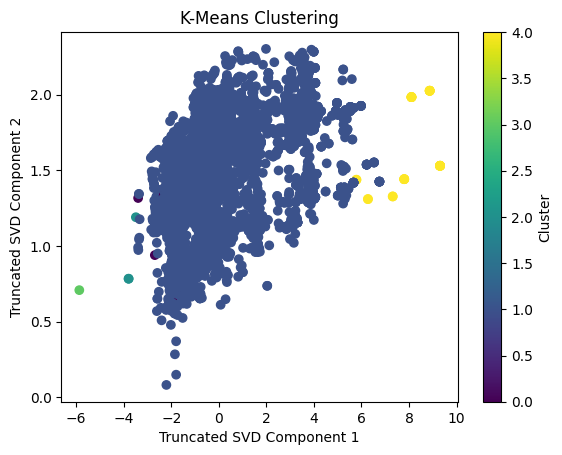

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Perform TruncatedSVD to reduce the dimensionality to 2
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_transformed)

# Create a scatter plot of the clusters
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels)
plt.xlabel('Truncated SVD Component 1')
plt.ylabel('Truncated SVD Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


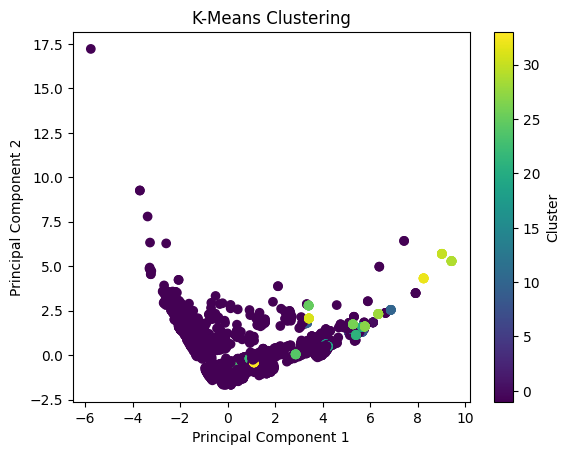

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_transformed.toarray())

# Create a scatter plot of the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
numeric_profiles = df.groupby('cluster')[numeric_columns].mean()
print(numeric_profiles)

         Rating_PS  Rating Count   Installs_PS  Minimum Installs      Free  \
cluster                                                                      
0         3.858571  1.334714e+03  1.432214e+04      1.718571e+04  0.000000   
1         4.032545  2.053191e+05  8.965957e+06      8.610579e+06  0.943952   
2         4.781905  9.833333e+01  1.000000e+03      1.000000e+03  0.000000   
3         3.500000  3.830000e+02  1.000000e+04      1.000000e+04  1.000000   
4         4.111333  1.084606e+06  4.033472e+07      5.534398e+07  1.000000   

         Ad Supported  In app purchases  Editor Choice    Reviews_PS  \
cluster                                                                
0                 1.0          0.714286       0.000000  8.211429e+02   
1                 1.0          0.349332       0.038009  3.450487e+05   
2                 1.0          0.000000       0.000000  5.333333e+01   
3                 1.0          0.000000       0.000000  2.575000e+02   
4                 1.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

categorical_frequencies = df.groupby('cluster')[categorical_columns].apply(lambda x: x.apply(lambda y: y.value_counts(normalize=True).to_dict())).unstack().fillna(0)
print(categorical_frequencies)

          cluster
App Name  0          {'Solitaire': 0.058383932741709485, 'Bubble Sh...
          1          {'Solitaire': 0.016713091922005572, 'Tiny Scan...
          2          {'Bubble Shooter': 0.03558718861209965, 'Netfl...
          3          {'Bubble Shooter': 0.08075370121130551, 'Solit...
          4          {'Calculator': 0.04011259676284307, 'Bubble Sh...
                                           ...                        
Genres    0          {'Tools': 0.14292386735170481, 'Personalizatio...
          1          {'Medical': 0.14763231197771587, 'Tools': 0.11...
          2          {'Action': 0.09489916963226572, 'Tools': 0.080...
          3          {'Casual': 0.0693135935397039, 'Tools': 0.0639...
          4          {'Tools': 0.14567206192821958, 'Photography': ...
Length: 70, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


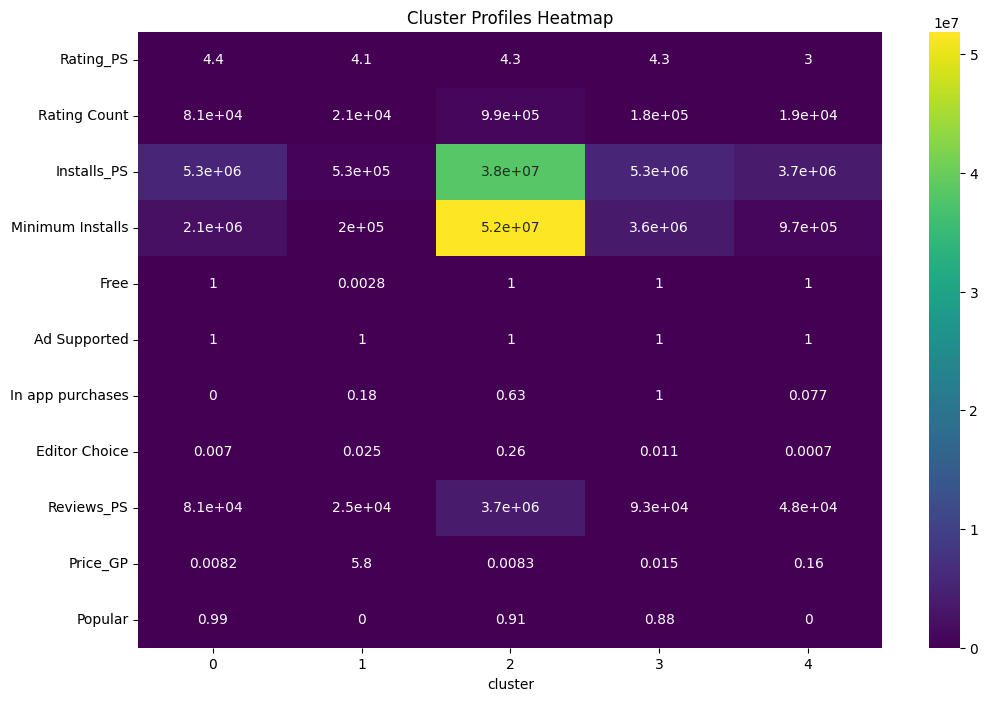

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_profiles.T, cmap='viridis', annot=True)
plt.title('Cluster Profiles Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


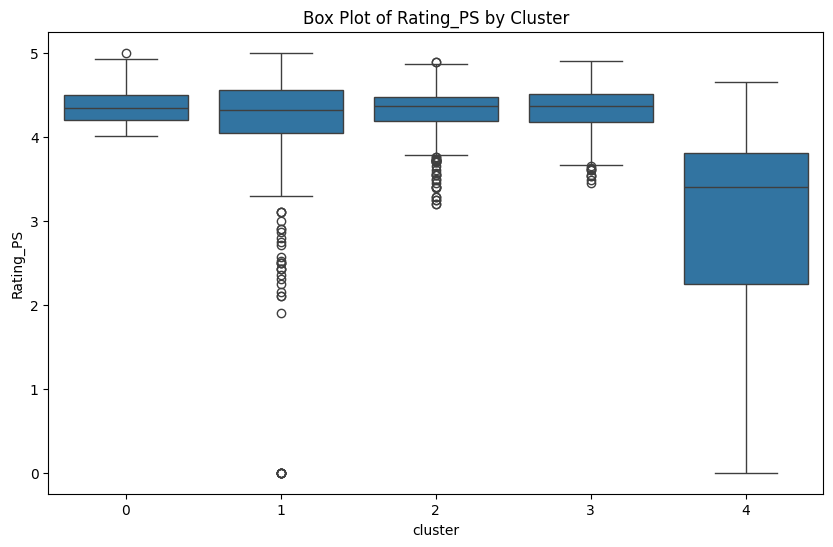

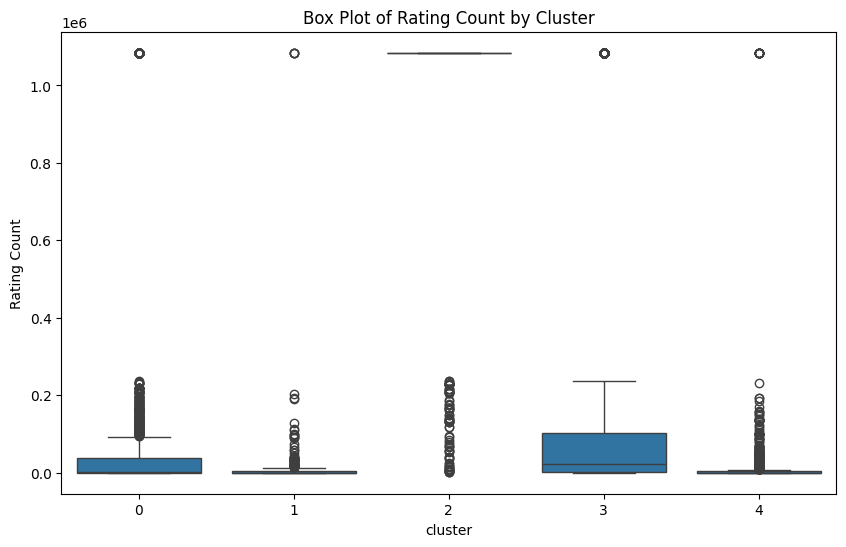

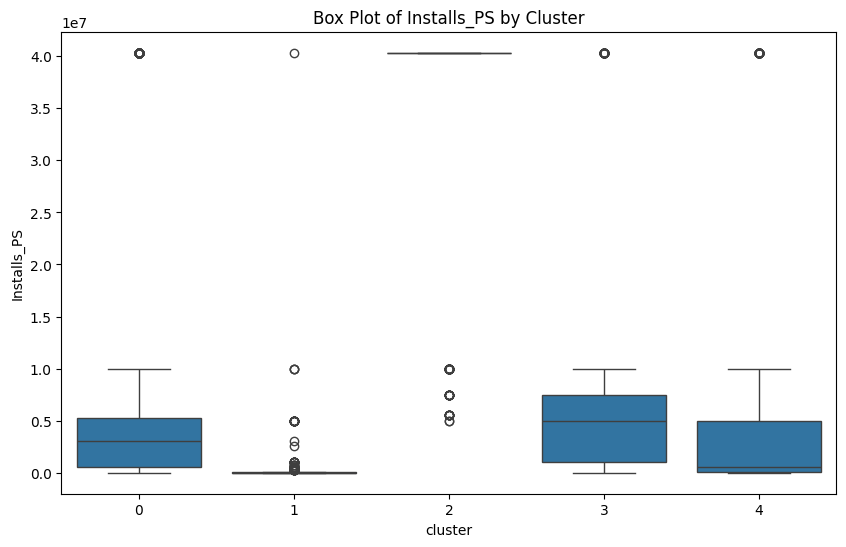

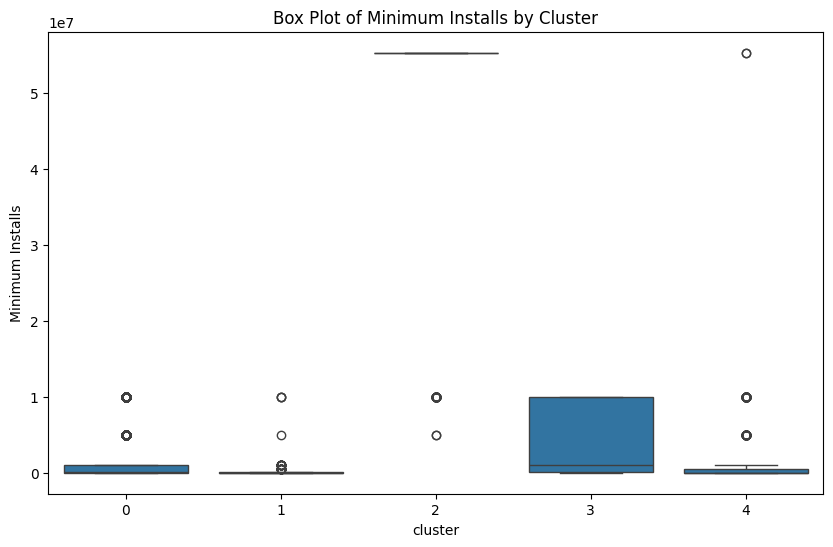

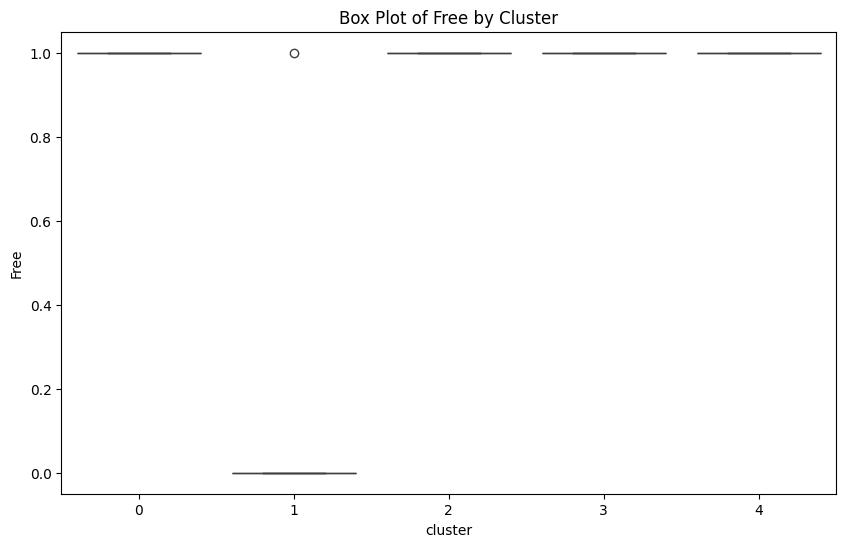

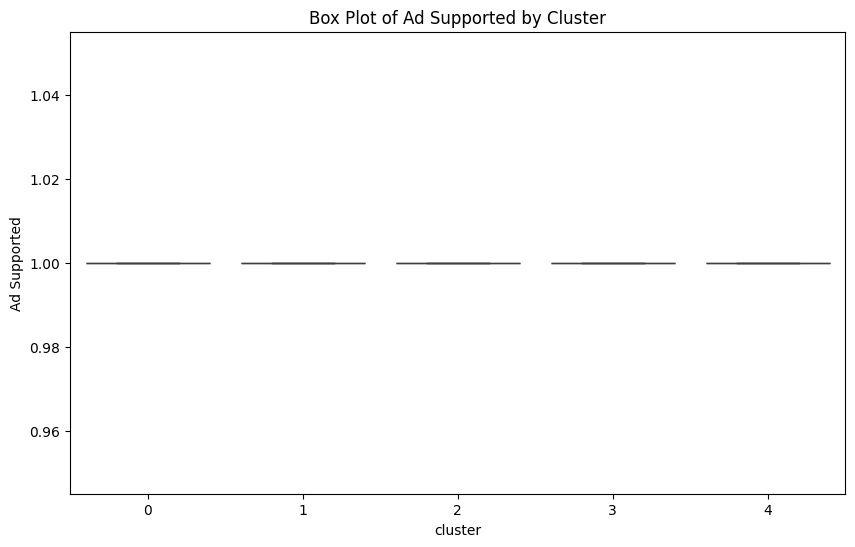

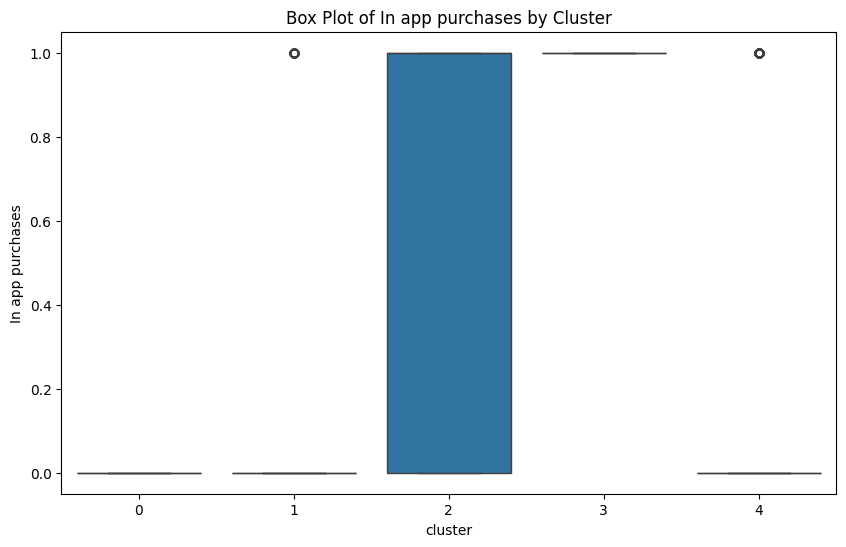

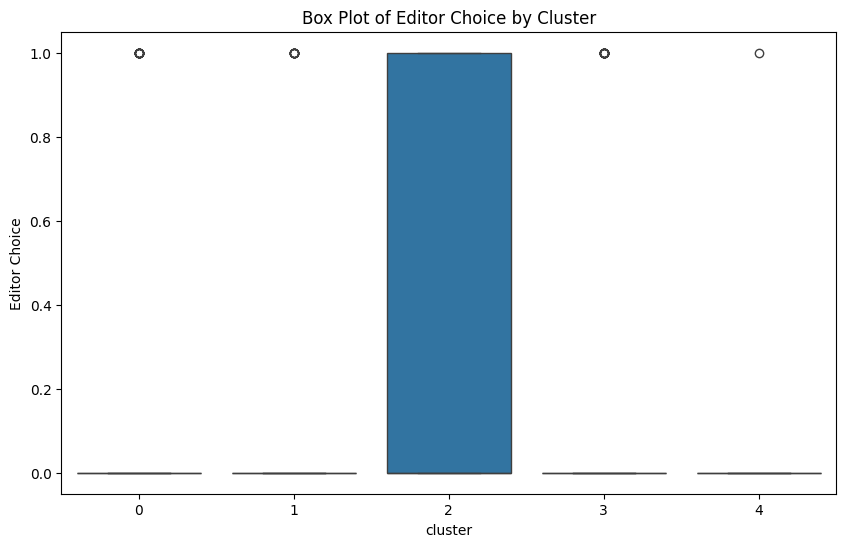

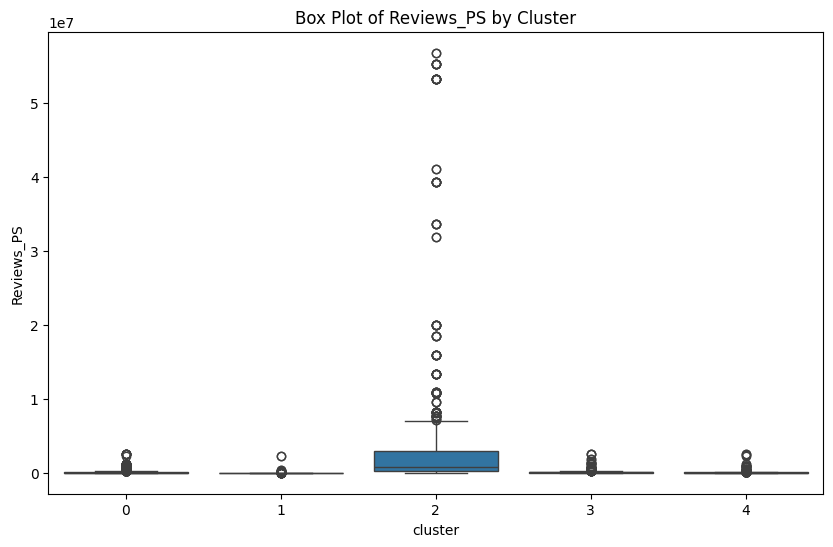

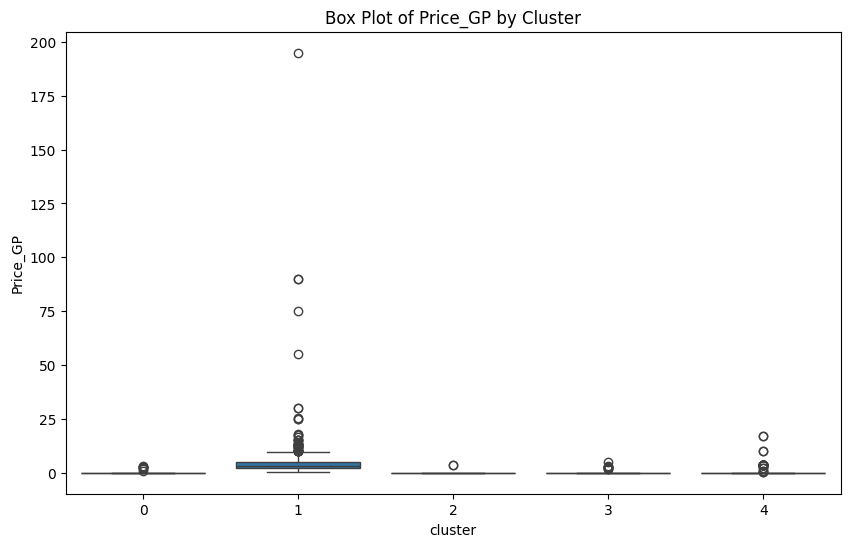

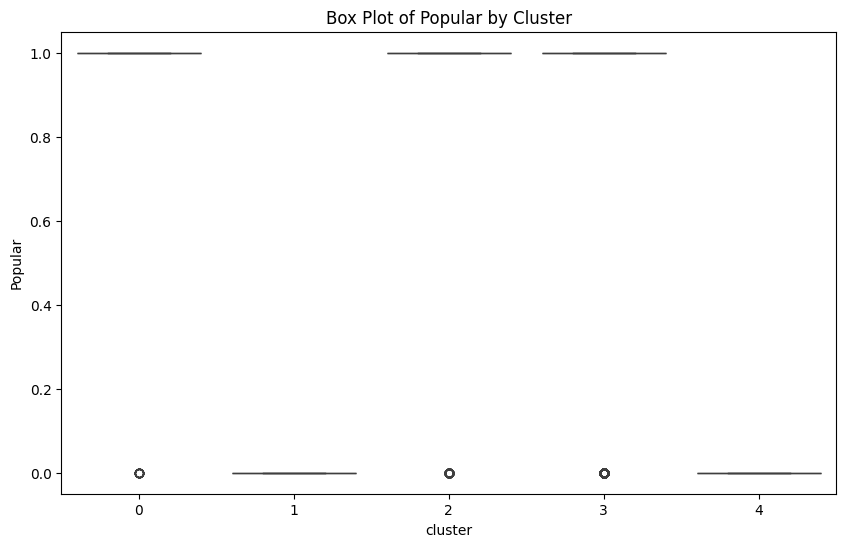

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=df)
    plt.title(f'Box Plot of {column} by Cluster')
    plt.show()






